# 1.0 Generación del conjunto de datos

Generaremos un conjuntos de datos random donde:
* X -> Representará el numero de equipos afectados en un incidente pasado
* Y -> Representará el coste económico de dicho incidente

De esta manera (X, Y), será un incidente en el que X equipos se vieron afectados y cuyo coste económico se cuantificó en Y euros(€).

In [1]:
# Importamos Numpy
import numpy as np

In [2]:
# Generamos 100 valores aleatorios para X e Y
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

In [3]:
print(f"El conjunto de datos esta compuesto por {X.size} pares")

El conjunto de datos esta compuesto por 100 pares


# 2.0 Visualización del conjunto de datos

La visualización del conjunto de datos nos permitirá ver con mayor claridad que datos estamos analizando

In [4]:
# Importamos Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

* El eje X serán los "Equipos afectados" (con un factor de conversión de 1000)
* El eje Y serán el "Coste económico" (con un factor de conversión de 10000)

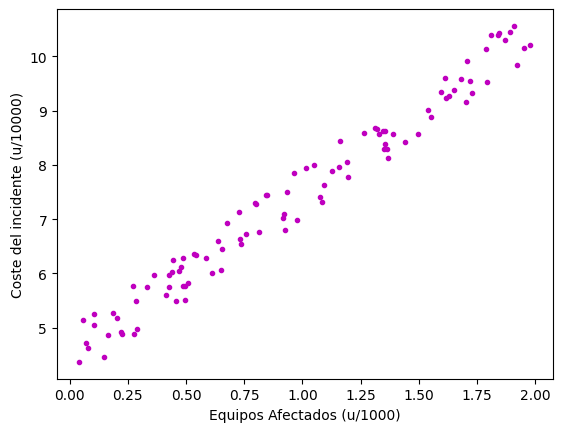

In [5]:
# Graficamos el conjunto de datos que acabamos de generar
plt.plot(X, Y, "m.")
plt.xlabel("Equipos Afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

# 3.0 Modificación del conjunto de datos

Tratamos el dataset para que los datos que contiene se adecuen a los valores reales

In [6]:
# Importamos Pandas
import pandas as pd

In [7]:
# Convertimos el conjunto de datos a un diccionario
data = {"n_equipos": X.flatten(), "coste": Y.flatten()}

# Lo convertimos a un DataFrame de Pandas
df = pd.DataFrame(data)
df.head(10)

,n_equipos,coste
0,0.330858,5.756182
1,1.919035,9.838114
2,0.611741,6.005133
3,1.679303,9.575293
4,1.909381,10.562299
5,1.321797,8.661441
6,0.458796,5.486500
7,0.225601,4.884476
8,0.103694,5.247319
9,1.083913,7.316918


### 3.1 Escalamos los datos usando el factor de conversion

In [8]:
df["n_equipos"] = df["n_equipos"] * 1000
df["coste"] = df["coste"] * 10000
df

,n_equipos,coste
0,330.858495,57561.822500
1,1919.034750,98381.140213
2,611.741299,60051.332369
3,1679.303204,95752.934572
4,1909.380967,105622.990058
...,...,...
95,1265.674205,85875.459746
96,440.040895,60245.196785
97,1978.265931,102133.081900
98,42.630512,43686.747729


In [9]:
# Convertimos los datos en numero enteros
df["n_equipos"] = df["n_equipos"].astype("int")
df["coste"] = df["coste"].astype("int")
df.head(10)

,n_equipos,coste
0,330,57561
1,1919,98381
2,611,60051
3,1679,95752
4,1909,105622
5,1321,86614
6,458,54865
7,225,48844
8,103,52473
9,1083,73169


### 3.2 Representamos de nuevo el conjunto de datos

Una vez hemos terminado de escalar los datos, la representación grafica es similar a la anterior pero ahora los datos estan escalados

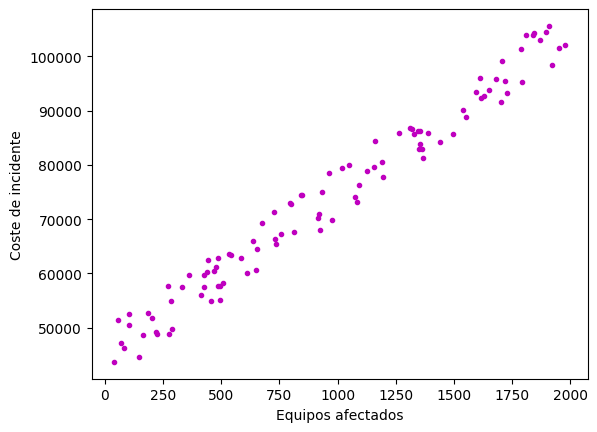

In [10]:
plt.plot(df["n_equipos"], df["coste"], "m.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente")
plt.show()

# 4.0 Construimos el modelo

In [11]:
# Importamos sklearn
from sklearn.linear_model import LinearRegression

In [12]:
# Contruimos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(df["n_equipos"].values.reshape(-1, 1), df["coste"])

LinearRegression()

### 4.1 Graficamos la función hipotesis

Representamos graficamente la funcion hipotesis generada por nuestro modelo.

In [13]:
# Creamos un array con los valores de X minimo y maximo
x_min_max = np.array([df["n_equipos"].min(), df["n_equipos"].max()])

In [14]:
# Hacemos una prediccion usando nuestro modelo, para obtener los valores en Y que predice el modelo
y_pred = model.predict(x_min_max.reshape(-1, 1))
y_pred

array([ 46554.093031  , 104138.24222504])

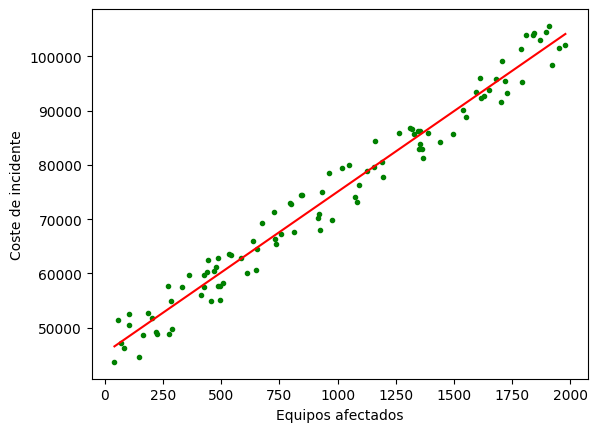

In [15]:
# Mostramos la función hipotesis generada por el modelo sobre el conjunto de datos de entrenamiento
plt.plot(df["n_equipos"], df["coste"], "g.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente")

plt.plot(x_min_max, y_pred, "red")

plt.show()

### 4.2 Realizamos algunas predicciones de ejemplo

In [16]:
# Realizamos una prediccion utilizando nuestro modelo ya entrenado, para un nuevo incidente que no estaba en nuestro
# conjunto de datos de entrenamiento original
x_new = np.array([1100])
print(x_new)

[1100]


In [17]:
# Realizamos la preddiccion del coste del incidente
y_new = model.predict(x_new.reshape(-1, 1))
y_new

array([78023.11671245])

### 4.3 Graficamos la prediccion del nuevo incidente

Graficamos la prediccion sobre el conjunto de datos y la funcion hipotesis, para comprobar de forma visualmente la predicción

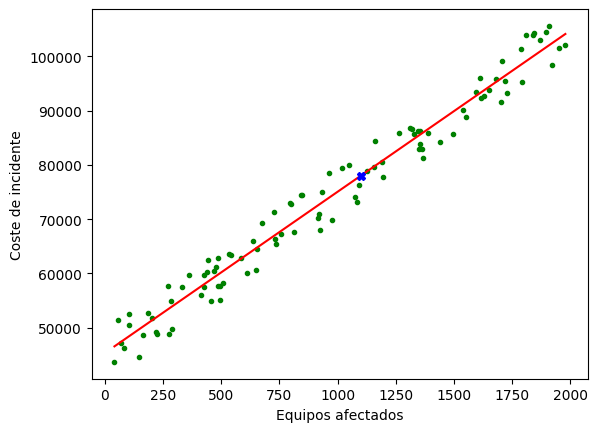

In [18]:
# Graficamos el conjunto de datos
plt.plot(df["n_equipos"], df["coste"], "g.")

# Graficamos la funcion hipotesis
plt.plot(x_min_max, y_pred, "red")

# Graficamos el incidente 
plt.plot(x_new, y_new, "bX")

# Mostramos gráfico completo
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente")
plt.show()

In [19]:
print(f"El coste del incidente predicho para {int(x_new[0])} equipos es de {int(y_new[0])} €uros.")

El coste del incidente predicho para 1100 equipos es de 78023 €uros.
